In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
(X_train, y_train), (X_text, y_test) = keras.datasets.mnist.load_data()

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


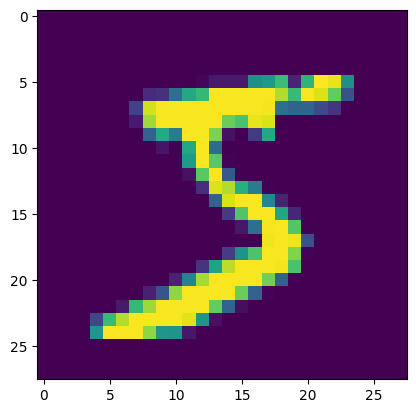

In [4]:
print(X_train.shape, X_text.shape, y_train.shape, y_test.shape)
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_text = X_text/255

In [6]:
model = Sequential()

In [7]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

v:\Projects\Project 1\project1\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8458 - loss: 0.5547 - val_accuracy: 0.9481 - val_loss: 0.1802
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9528 - loss: 0.1644 - val_accuracy: 0.9640 - val_loss: 0.1250
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9689 - loss: 0.1071 - val_accuracy: 0.9681 - val_loss: 0.1072
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9768 - loss: 0.0778 - val_accuracy: 0.9705 - val_loss: 0.0984
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9834 - loss: 0.0587 - val_accuracy: 0.9692 - val_loss: 0.1045
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9858 - loss: 0.0480 - val_accuracy: 0.9737 - val_loss: 0.0868
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0392 - val_accuracy: 0.9752 - val_loss: 0.0827
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9920 - loss: 0.0288 - val_accuracy: 0.9746 - val_

In [11]:
model.evaluate(X_text,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1153


[0.09880578517913818, 0.9763000011444092]

In [12]:
model.predict(X_text)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.8729951e-11, 1.4832816e-14, 1.0929969e-09, ..., 9.9999976e-01,
        5.4432561e-12, 4.0589940e-09],
       [5.1671673e-14, 6.0416369e-06, 9.9999392e-01, ..., 6.8486062e-19,
        2.1907394e-10, 1.3390461e-19],
       [2.2182005e-10, 9.9995792e-01, 1.8289410e-07, ..., 5.7677053e-06,
        3.6038531e-05, 2.2192956e-11],
       ...,
       [3.5170805e-19, 6.9047557e-20, 8.5534329e-21, ..., 1.5589668e-11,
        5.9289287e-13, 1.8517172e-08],
       [1.6163988e-17, 3.3565500e-17, 2.1197656e-21, ..., 2.3641506e-14,
        1.9814550e-09, 2.6773651e-22],
       [2.3321430e-13, 9.9746794e-21, 2.2897043e-15, ..., 6.6338298e-21,
        3.0977901e-20, 1.0584838e-18]], dtype=float32)

In [13]:
model.predict(X_text).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

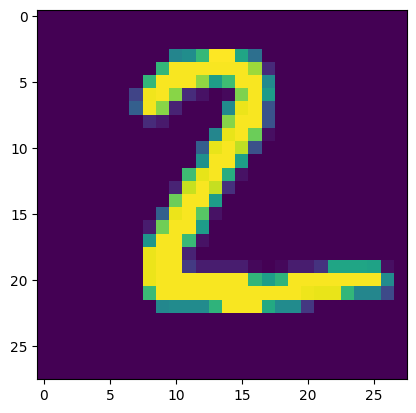

In [14]:
plt.imshow(X_text[1])

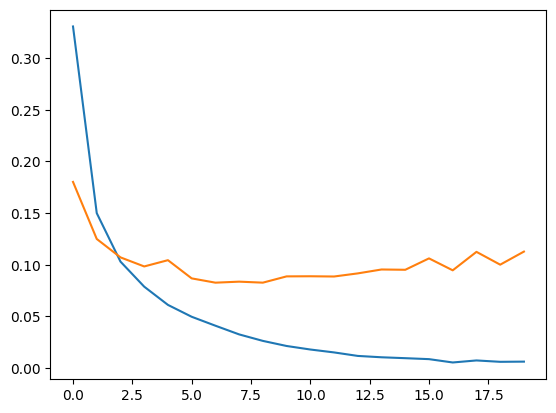

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

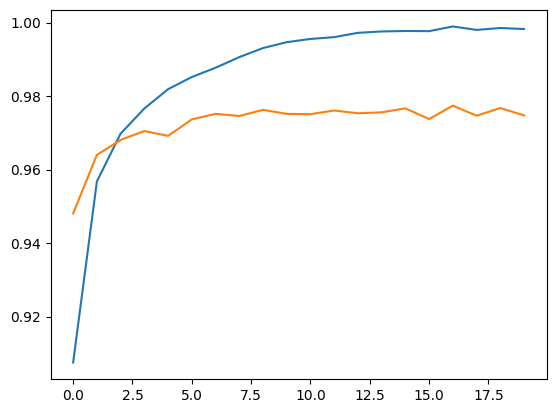

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])